Library Import

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imputer
from sklearn.impute import KNNImputer

# encoding , scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

# split data
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error,roc_curve, roc_auc_score


WE DON'T MERGE THE TWO MODELS EVEN THEY BOTH USE THE SAME DATASET BEACOUS OF "DATA LEAKAGE"

1- DATA EXPLORATION

In [91]:
# reading data
df = pd.read_csv(r"C:\Users\dohah\Documents\Projects\Detecting Malaria Model\MachineLearningProject\dataset\healthcare-dataset-stroke-data.csv")

In [92]:
# data exploration 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [93]:
print(df['stroke'].value_counts())
print(sum(df['stroke'].value_counts()))
print("------------------------------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------------------------------")
print(df.isnull().sum())

stroke
0    4861
1    4861
Name: count, dtype: int64
9722
------------------------------------------------------------------------------
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------------------------
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  961
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# values
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['smoking_status'].unique())

['Male' 'Female']
['No' 'Yes']
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Unknown' 'never smoked' 'formerly smoked' 'smokes']


2- DATA PREPROCESSING

In [94]:
# checking for duplicate rows
print(df.duplicated().sum())

0


In [95]:
# check the missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  961
smoking_status         0
stroke                 0
dtype: int64

In [96]:
# handeling missing values <in the target>   -- fill it eith the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [97]:
# check the result of handeled values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [98]:
# target selecting
target = 'bmi'

In [99]:
# categorical featur selecting
feature_cols = ['gender', 'ever_married', 'work_type', 'smoking_status']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [100]:
# X & Y matrices

# encoding categorical features & defining numerical featurs
X_cat = encoder.fit_transform(df[feature_cols])
X_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']] 

In [101]:
# merging cat with num data in featur matrix 
X = np.hstack([pd.DataFrame(X_num).values, X_cat]) # feature matrix     --- hstack : horizontal stack <nums at left , one hot at right>
# target
y = df[target] # target vector

In [105]:
# X check
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3.0,0.0,0.0,95.12,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,58.0,1.0,0.0,87.96,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.0,0.0,0.0,110.89,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,70.0,0.0,0.0,69.04,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,14.0,0.0,0.0,161.28,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [106]:
# y check
pd.DataFrame(y).head()

,bmi
0,18.0
1,39.2
2,17.6
3,35.9
4,19.1


In [107]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=0,
                                                    shuffle=True
                                                    )


In [108]:
# scaling
scaler = StandardScaler()
X_train[:, :len(X_num)] = scaler.fit_transform(X_train[:, :len(X_num)])
X_test[:, :len(X_num)] = scaler.transform(X_test[:, :len(X_num)])

3- LR MODEL

In [109]:
# Linear Regression

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict y
y_pred = regressor.predict(X_test)


4- EVALUATION

In [110]:
#delete
y_pred.shape

(973,)

In [111]:
# check y_test & y_pred
comparison = pd.DataFrame({'y_test': y_test[:10].ravel(), 'y_pred': y_pred[:10].ravel()})
print(comparison)

   y_test     y_pred
0    28.6  28.577117
1    29.7  28.032464
2    34.4  28.168716
3    29.6  30.751373
4    37.5  27.341240
5    32.6  30.479286
6    20.5  30.015526
7    25.5  28.832812
8    39.4  28.975469
9    28.8  32.867706


C:\Users\dohah\AppData\Local\Temp\ipykernel_1012\2285337742.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  comparison = pd.DataFrame({'y_test': y_test[:10].ravel(), 'y_pred': y_pred[:10].ravel()})


In [112]:
# mid MSE  -- need to be low
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  33.34808096651073


Actual vs Predicted Graph

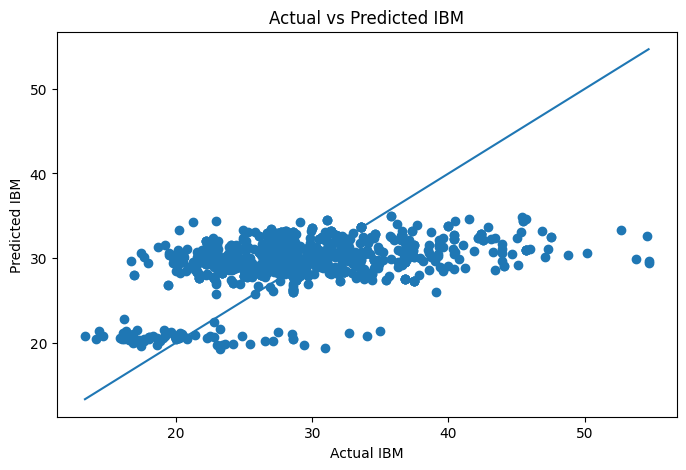

In [ ]:
plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")

min_y = min(y_test.min(), y_pred.min())
max_y = max(y_test.max(), y_pred.max())
plt.plot([min_y, max_y], [min_y, max_y])

plt.show()

5- PREDICT BMI EXAMBLE

In [141]:
trial_values = [[40, 0, 0, 120, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]]
trial_df = pd.DataFrame(trial_values, columns=X_train.columns)

predicted_bmi = regressor.predict(trial_df)
print("Predicted BMI:", round(predicted_bmi[0], 1))   # output should be -- 25.0 --

Predicted BMI: 24.6


In [ ]:
# Exambles from chat to check
# [30, 0, 0, 90, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]   22.5
# [55, 1, 1, 150, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]	27.8
# [40, 0, 0, 120, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]	25.0
# [50, 1, 0, 140, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]	26.5